# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [23]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

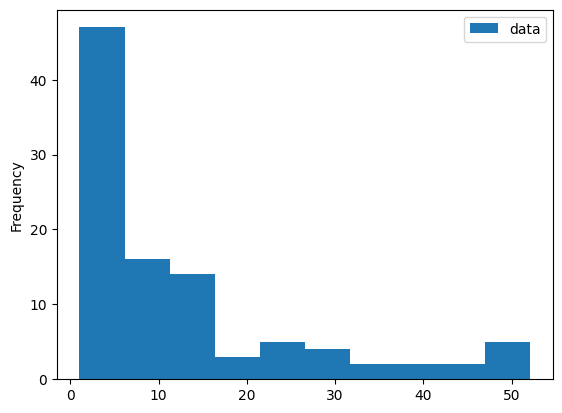

In [24]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

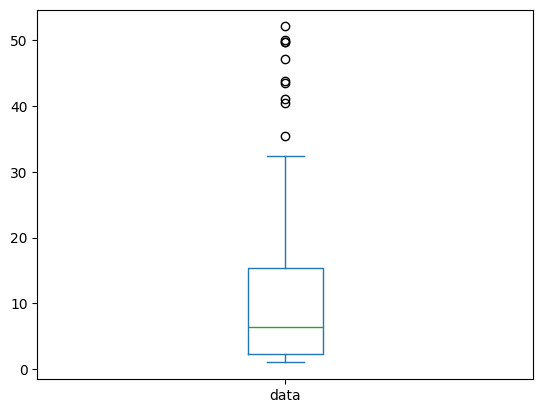

In [25]:
df.plot.box()

Both the histogram and boxplot are useful for understanding the distribution of drug prices at the pharmacy, but they serve different purposes.
Histogram

The histogram gives a clear view of how drug prices are distributed. Most of the prices seem to be on the lower end, while a few are much higher. This makes it easy to see where most of the prices fall and how spread out they are. However, the histogram doesn’t highlight specific outliers, and the way the bins are grouped can affect how the data looks.
Boxplot

The boxplot, on the other hand, is great for summarizing key statistics. It shows the median price, the range of most prices, and highlights any unusually expensive drugs as outliers. This makes it especially useful for answering the administrator’s question about high-priced drugs. However, it doesn’t give as much detail about the frequency of different price ranges as the histogram does.
Which One is Better?

If the goal is to understand how much more expensive the costly drugs are compared to the others, the boxplot is the better choice because it directly highlights outliers and shows the range of prices at a glance.
How to Improve the Visualization?

- For the histogram, adjusting the bin size could make it easier to see patterns. Adding a log scale for the x-axis might also help if there’s a big gap between cheap and expensive drugs.
- For the boxplot, adding labels for the median and quartiles would make it easier to read. Using a different color for outliers could also help them stand out more.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [26]:
import pandas as pd

injury_file = "/Users/chrismckee/Downloads/nfl_injury_list.csv"
df_injury = pd.read_csv(injury_file)

play_list_file = "/Users/chrismckee/Downloads/nfl_play_list.csv"
df_play_list = pd.read_csv(play_list_file)

df_injury["PlayerKey"] = df_injury["PlayerKey"].astype(str)
df_injury["GameID"] = df_injury["GameID"].astype(str)
df_injury["PlayKey"] = df_injury["PlayKey"].astype(str)

df_play_list["PlayerKey"] = df_play_list["PlayerKey"].astype(str)
df_play_list["GameID"] = df_play_list["GameID"].astype(str)
df_play_list["PlayKey"] = df_play_list["PlayKey"].astype(str)

df_merged = df_injury.merge(df_play_list, on=["PlayerKey", "GameID", "PlayKey"], how="left")

df_merged.to_csv("merged_nfl_injury_data.csv", index=False)

print(df_merged.head())


  PlayerKey   GameID     PlayKey BodyPart    Surface  DM_M1  DM_M7  DM_M28  \
0     39873  39873-4  39873-4-32     Knee  Synthetic      1      1       1   
1     46074  46074-7  46074-7-26     Knee    Natural      1      1       0   
2     36557  36557-1  36557-1-70    Ankle  Synthetic      1      1       1   
3     46646  46646-3  46646-3-30    Ankle    Natural      1      0       0   
4     43532  43532-5  43532-5-69    Ankle  Synthetic      1      1       1   

   DM_M42 RosterPosition  PlayerDay  PlayerGame       StadiumType  FieldType  \
0       1     Linebacker       29.0         4.0           Indoors  Synthetic   
1       0     Linebacker       50.0         7.0              Open    Natural   
2       1         Safety        1.0         1.0           Outdoor  Synthetic   
3       0     Linebacker       15.0         3.0           Outdoor    Natural   
4       1  Wide Receiver       32.0         5.0  Retractable Roof  Synthetic   

   Temperature         Weather PlayType  PlayerGam

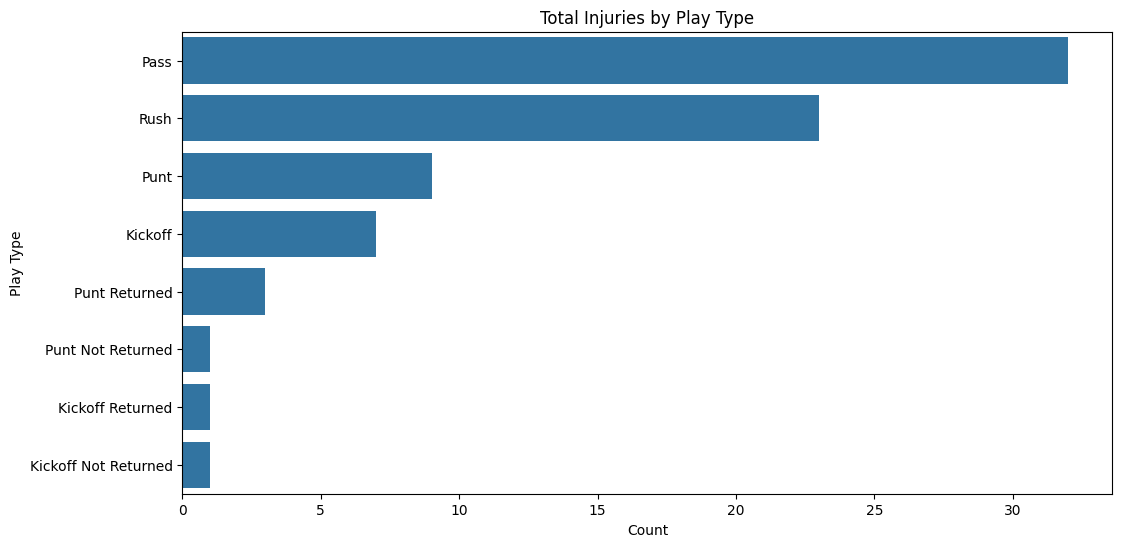

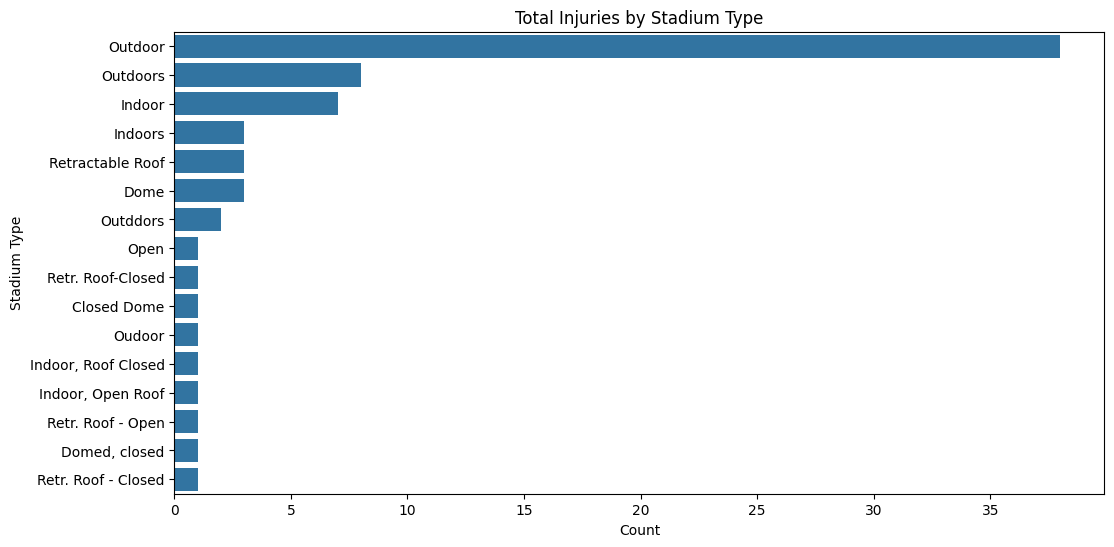

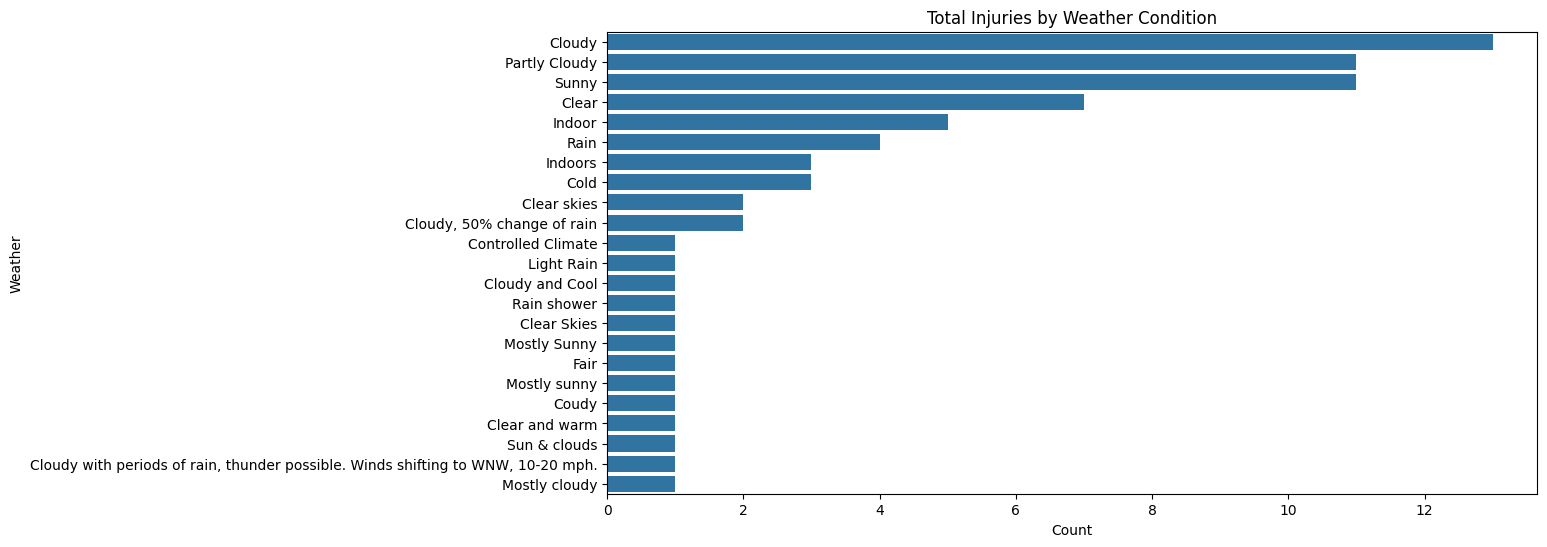

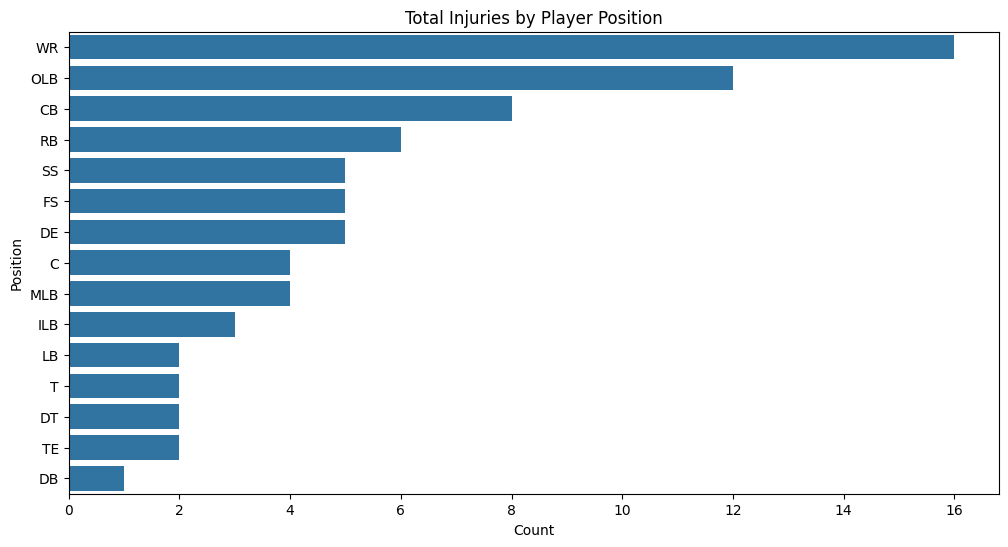

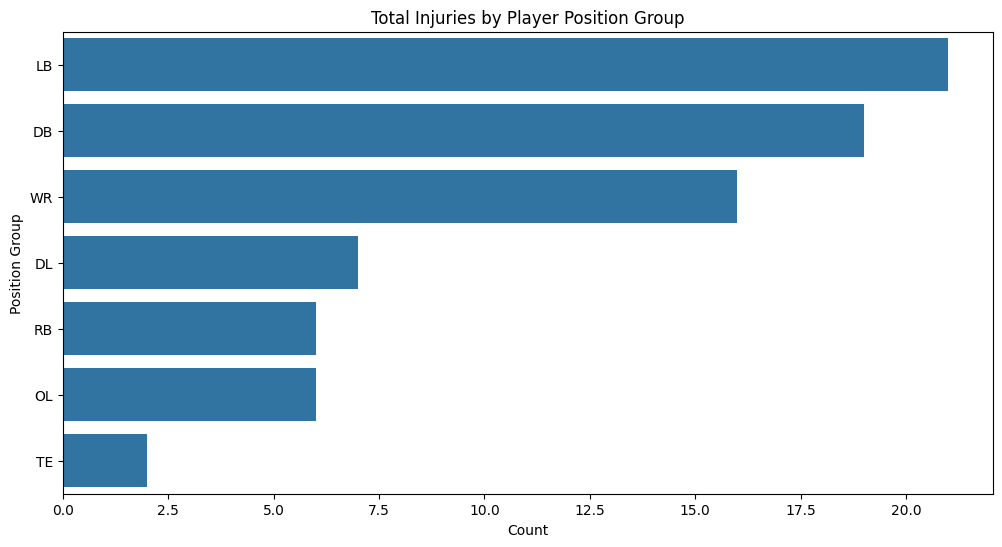

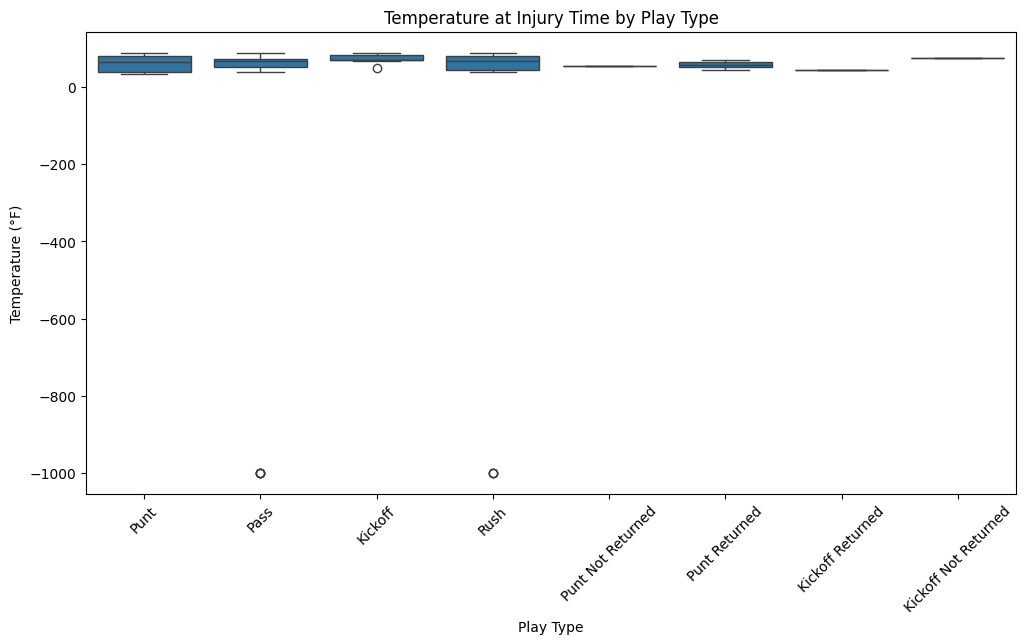

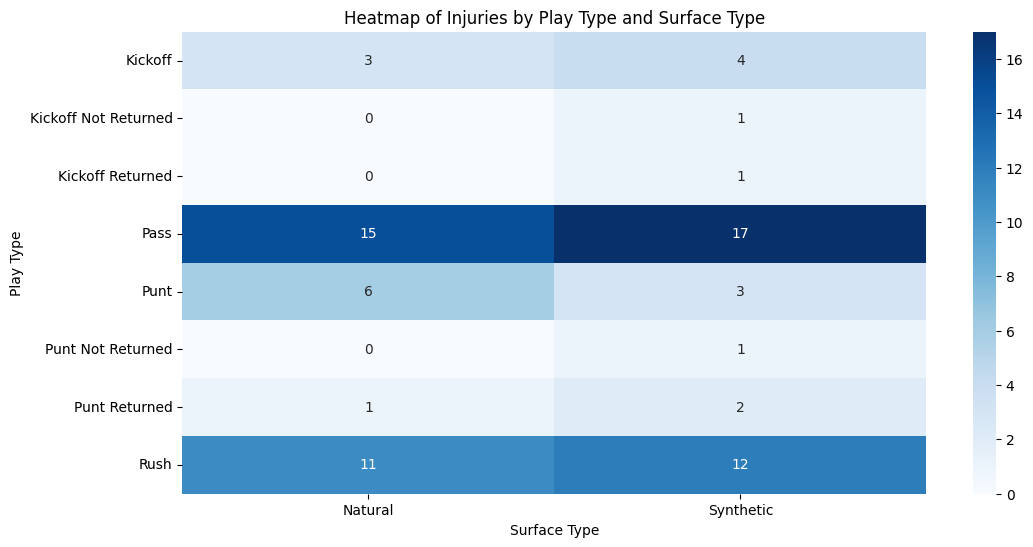

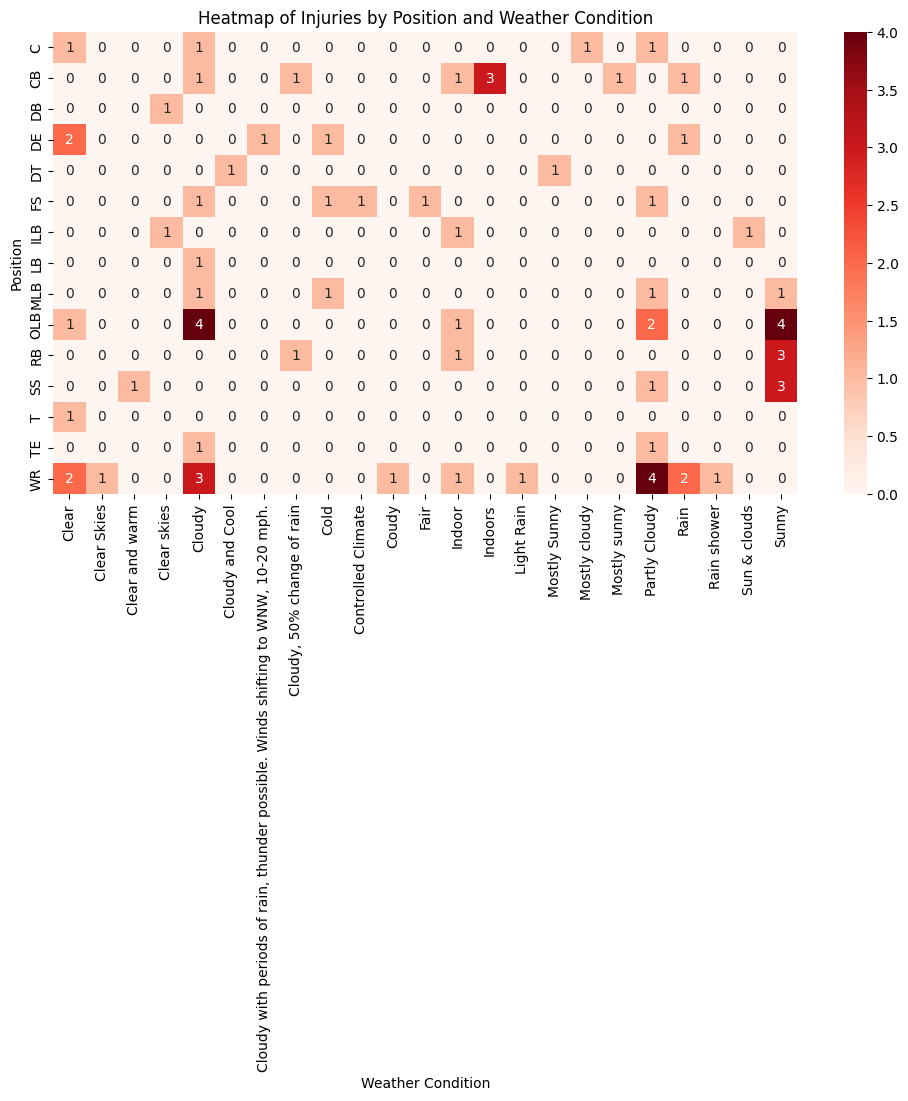

Summary Statistics for PlayerGamePlay by PlayType:
                      count       mean        std   min    25%   50%    75%  \
PlayType                                                                      
Kickoff                 7.0  19.000000  23.014488   1.0   8.50  10.0  18.00   
Kickoff Not Returned    1.0   1.000000        NaN   1.0   1.00   1.0   1.00   
Kickoff Returned        1.0   3.000000        NaN   3.0   3.00   3.0   3.00   
Pass                   32.0  30.187500  18.617435   2.0  15.75  28.0  41.25   
Punt                    9.0  15.555556  11.695203   2.0   6.00  16.0  26.00   
Punt Not Returned       1.0  55.000000        NaN  55.0  55.00  55.0  55.00   
Punt Returned           3.0  22.000000   9.848858  14.0  16.50  19.0  26.00   
Rush                   23.0  26.956522  22.357586   1.0   9.00  21.0  43.00   

                       max  
PlayType                    
Kickoff               69.0  
Kickoff Not Returned   1.0  
Kickoff Returned       3.0  
Pass         

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['PlayType'], order=df_merged['PlayType'].value_counts().index)
plt.title("Total Injuries by Play Type")
plt.xlabel("Count")
plt.ylabel("Play Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['StadiumType'], order=df_merged['StadiumType'].value_counts().index)
plt.title("Total Injuries by Stadium Type")
plt.xlabel("Count")
plt.ylabel("Stadium Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['Weather'], order=df_merged['Weather'].value_counts().index)
plt.title("Total Injuries by Weather Condition")
plt.xlabel("Count")
plt.ylabel("Weather")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['Position'], order=df_merged['Position'].value_counts().index)
plt.title("Total Injuries by Player Position")
plt.xlabel("Count")
plt.ylabel("Position")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['PositionGroup'], order=df_merged['PositionGroup'].value_counts().index)
plt.title("Total Injuries by Player Position Group")
plt.xlabel("Count")
plt.ylabel("Position Group")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x="PlayType", y="Temperature")
plt.xticks(rotation=45)
plt.title("Temperature at Injury Time by Play Type")
plt.xlabel("Play Type")
plt.ylabel("Temperature (°F)")
plt.show()

injury_pivot = df_merged.pivot_table(index='PlayType', columns='Surface', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(injury_pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap of Injuries by Play Type and Surface Type")
plt.xlabel("Surface Type")
plt.ylabel("Play Type")
plt.show()

injury_pivot = df_merged.pivot_table(index='Position', columns='Weather', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(injury_pivot, annot=True, fmt="d", cmap="Reds")
plt.title("Heatmap of Injuries by Position and Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Position")
plt.show()

summary_stats = df_merged.groupby("PlayType")["PlayerGamePlay"].describe()
print("Summary Statistics for PlayerGamePlay by PlayType:")
print(summary_stats)


# NFL Injury Analysis

### Are the data what you expect? Are they usable?
- The dataset is mostly usable, containing structured information about injuries, play types, weather, surfaces, and positions.
- Unexpected findings:
  - Injuries were not more frequent on synthetic fields.
  - Special teams plays (kickoff, punt) had fewer injuries than expected.
  - Some temperature values seemed extreme, suggesting possible errors.

### What is the overall shape of the distribution?
- The injury count distribution is skewed, with certain body parts and positions having significantly more injuries than others.
- The PlayerGamePlay distribution is right-skewed, meaning more injuries happen later in the game.
- Temperature distribution appears normal except for outliers.
- Injury counts by play type are unevenly distributed, with passing and rushing plays having the highest injury rates.

### Are there any outliers present?
- Yes, several outliers were detected:
  - Temperature data had extreme values (negative or abnormally high).
  - Some injuries happened very late into games, possibly due to fatigue.
  - Certain weather conditions had very few recorded injuries.

### How does the distribution change across different groups?
- **Surface Type:** Injuries occur similarly on both natural and synthetic fields.
- **Position:** WRs, LBs, and DBs have higher injury rates. Linemen have fewer injuries.
- **Play Type:** Passing and rushing plays show the highest injury frequency. Kickoffs and punts have fewer injuries but might be more severe.

### What are the minimum and maximum values in the histograms?
- **Temperature:** Some negative values (likely errors). Maximum approached 100°F.
- **Injury Count by Body Part:** Few injuries recorded for foot and wrist. Knee and ankle injuries were the most common.
- **Play Counts Before Injury:** Some injuries occurred within the first few plays, while others happened after 50+ plays.

### How do bin sizes affect the histogram?
- Smaller bins reveal more detail about injury frequency.
- Larger bins smooth out variations but may hide patterns.
- Adjusting bins in temperature data helped separate outliers from normal values.

### Does the distribution appear normal?
- Injury counts per position are skewed, not normal.
- Temperature data appears mostly normal except for outliers.
- Play counts before injury are right-skewed, meaning more injuries occur later in games.
- Position-based injury risk varies significantly.

### Final Thoughts
- The dataset is mostly usable but needs some cleaning (e.g., temperature outliers).
- The distribution is skewed in most cases, especially for injuries by position and play type.
- Further analysis could focus on injury severity (e.g., games missed by play type or surface).


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_7857/3053420336.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(injury_counts.index, rotation=45)


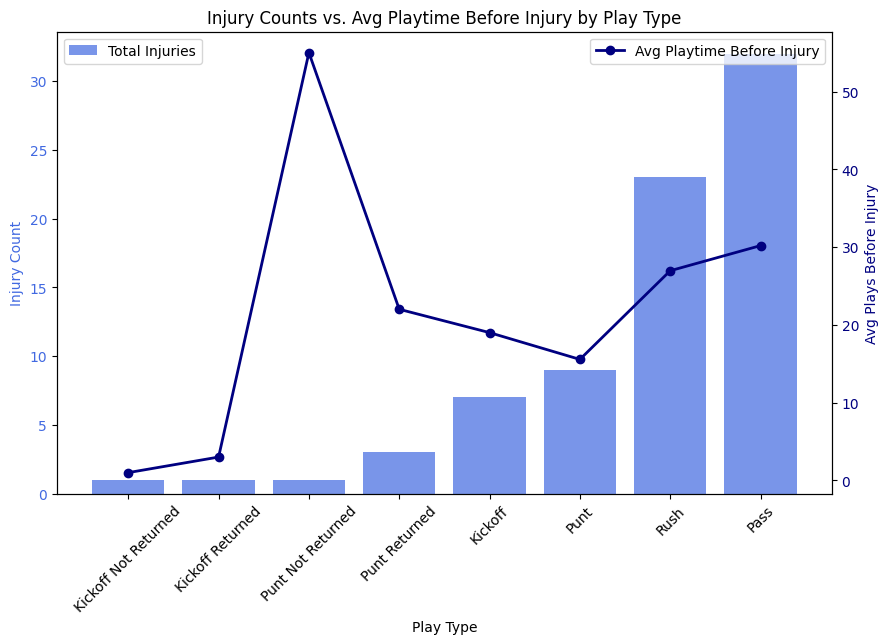

In [28]:
avg_playtime = df_merged.groupby("PlayType")["PlayerGamePlay"].mean()

injury_counts = injury_counts.sort_values(ascending=True)
avg_playtime = avg_playtime.loc[injury_counts.index]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(injury_counts.index, injury_counts, color="royalblue", alpha=0.7, label="Total Injuries")
ax1.set_xlabel("Play Type")
ax1.set_ylabel("Injury Count", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")
ax1.set_xticklabels(injury_counts.index, rotation=45)

ax2 = ax1.twinx()
ax2.plot(avg_playtime.index, avg_playtime, color="navy", marker="o", linestyle="-", linewidth=2, label="Avg Playtime Before Injury")
ax2.set_ylabel("Avg Plays Before Injury", color="navy")
ax2.tick_params(axis="y", labelcolor="navy")

plt.title("Injury Counts vs. Avg Playtime Before Injury by Play Type")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()
